# Covid -19 Symptoms Prediction 

## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Reading Data

In [2]:
#I imported the dataset into my pc as a local file
data = pd.read_csv('corona_tested_individuals_ver_0083.english.csv')

## Displaying Data

In [3]:
data

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
2742591,2020-03-11,0,0,0,0,0,negative,NaN,female,Other
2742592,2020-03-11,0,0,0,0,0,negative,NaN,female,Other
2742593,2020-03-11,0,0,0,0,0,other,NaN,male,Other
2742594,2020-03-11,0,0,0,0,0,negative,NaN,female,Other


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742596 entries, 0 to 2742595
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   test_date            object
 1   cough                int64 
 2   fever                int64 
 3   sore_throat          int64 
 4   shortness_of_breath  int64 
 5   head_ache            int64 
 6   corona_result        object
 7   age_60_and_above     object
 8   gender               object
 9   test_indication      object
dtypes: int64(5), object(5)
memory usage: 209.2+ MB


## Cleaning data

In [5]:
#checking for columns with NaN values
data.isnull().sum()

test_date                   0
cough                       0
fever                       0
sore_throat                 0
shortness_of_breath         0
head_ache                   0
corona_result               0
age_60_and_above       547644
gender                  92886
test_indication             0
dtype: int64

In [6]:
#drop all the rows with NaN values
data.dropna()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
2731639,2020-03-20,1,1,1,1,1,positive,No,female,Contact with confirmed
2731640,2020-03-20,0,0,0,0,0,negative,No,female,Other
2731643,2020-03-20,1,0,0,0,0,negative,No,male,Contact with confirmed
2731644,2020-03-20,0,0,0,0,0,negative,No,female,Other


In [7]:
data.shape

(2742596, 10)

In [8]:
# drop test-date column since it won't affect the predictions
data.drop("test_date",axis=1,inplace=True)

In [9]:
# drop values of each column that are not digits
data = data[data['cough'].apply(lambda x: str(x).isdigit())]
data = data[data['fever'].apply(lambda x: str(x).isdigit())]
data = data[data['sore_throat'].apply(lambda x: str(x).isdigit())]
data = data[data['shortness_of_breath'].apply(lambda x: str(x).isdigit())]
data = data[data['head_ache'].apply(lambda x: str(x).isdigit())]

In [10]:
data.shape

(2742596, 9)

In [11]:
#The final_data that will be used
final_data = data

In [12]:
final_data.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,0,0,0,0,negative,No,male,Other
1,0,1,0,0,0,negative,No,male,Other
2,0,0,0,0,0,negative,Yes,female,Other
3,0,0,0,0,0,negative,No,male,Other
4,0,1,0,0,0,negative,No,male,Contact with confirmed


## Interacting with Data

In [13]:
display(final_data)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,0,0,0,0,negative,No,male,Other
1,0,1,0,0,0,negative,No,male,Other
2,0,0,0,0,0,negative,Yes,female,Other
3,0,0,0,0,0,negative,No,male,Other
4,0,1,0,0,0,negative,No,male,Contact with confirmed
...,...,...,...,...,...,...,...,...,...
2742591,0,0,0,0,0,negative,NaN,female,Other
2742592,0,0,0,0,0,negative,NaN,female,Other
2742593,0,0,0,0,0,other,NaN,male,Other
2742594,0,0,0,0,0,negative,NaN,female,Other


## Data Size

In [14]:
display("Shape of data")
print("Rows:",final_data.shape[0],"\nColumns:",final_data.shape[1])

'Shape of data'

Rows: 2742596 
Columns: 9


In [15]:
display('NULL Values', final_data.isnull().sum())

'NULL Values'

cough                       0
fever                       0
sore_throat                 0
shortness_of_breath         0
head_ache                   0
corona_result               0
age_60_and_above       547644
gender                  92886
test_indication             0
dtype: int64

In [16]:
final_data.describe()


,cough,fever,sore_throat,shortness_of_breath,head_ache
count,2.742596e+06,2.742596e+06,2.742596e+06,2.742596e+06,2.742596e+06
mean,4.059584e-02,3.536649e-02,1.096917e-02,4.016997e-03,2.185557e-02
std,1.973521e-01,1.847044e-01,1.041578e-01,6.325237e-02,1.462119e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [17]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2742596 entries, 0 to 2742595
Data columns (total 9 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   cough                int64 
 1   fever                int64 
 2   sore_throat          int64 
 3   shortness_of_breath  int64 
 4   head_ache            int64 
 5   corona_result        object
 6   age_60_and_above     object
 7   gender               object
 8   test_indication      object
dtypes: int64(5), object(4)
memory usage: 209.2+ MB


## Data Distribution

In [18]:
for i in final_data.columns:
    print("\nColumn Name:",i,final_data[i].unique(),"Unique Count",len(final_data[i].unique()))


Column Name: cough [0 1] Unique Count 2

Column Name: fever [0 1] Unique Count 2

Column Name: sore_throat [0 1] Unique Count 2

Column Name: shortness_of_breath [0 1] Unique Count 2

Column Name: head_ache [0 1] Unique Count 2

Column Name: corona_result ['negative' 'positive' 'other'] Unique Count 3

Column Name: age_60_and_above ['No' 'Yes' nan] Unique Count 3

Column Name: gender ['male' 'female' nan] Unique Count 3

Column Name: test_indication ['Other' 'Contact with confirmed' 'Abroad'] Unique Count 3


In [19]:
# convert data types
convert_dict = {'cough': int, 
                'fever': int, 
                'sore_throat': int, 
                'shortness_of_breath': int, 
                'head_ache': int}
final_data = final_data.astype(convert_dict)

In [20]:
for i in final_data.columns:
    print("\nColumn Name:",i,final_data[i].unique(),"Unique Count",len(final_data[i].unique()))


Column Name: cough [0 1] Unique Count 2

Column Name: fever [0 1] Unique Count 2

Column Name: sore_throat [0 1] Unique Count 2

Column Name: shortness_of_breath [0 1] Unique Count 2

Column Name: head_ache [0 1] Unique Count 2

Column Name: corona_result ['negative' 'positive' 'other'] Unique Count 3

Column Name: age_60_and_above ['No' 'Yes' nan] Unique Count 3

Column Name: gender ['male' 'female' nan] Unique Count 3

Column Name: test_indication ['Other' 'Contact with confirmed' 'Abroad'] Unique Count 3


## Visual Representation

<AxesSubplot:xlabel='corona_result', ylabel='count'>

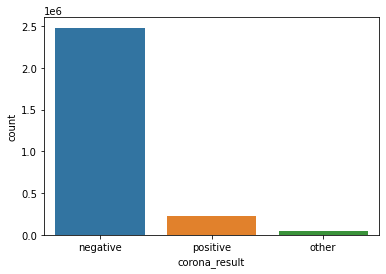

In [21]:
# frequency
sns.countplot(final_data['corona_result'])

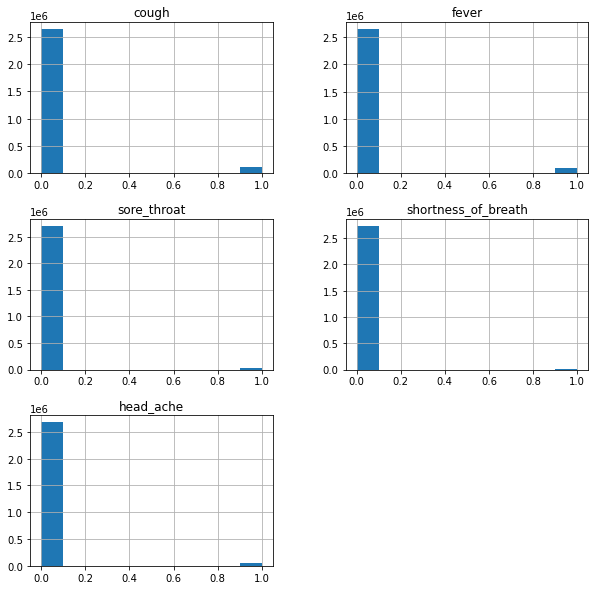

In [22]:
# frequency of different numeric features
final_data.hist(figsize = (10,10))
plt.show()

<AxesSubplot:xlabel='fever', ylabel='corona_result'>

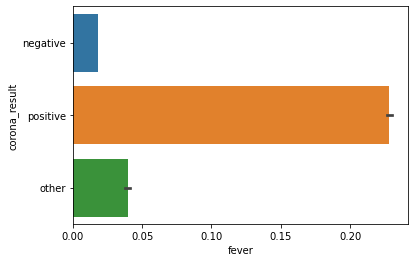

In [23]:
#corona_result v/s feature plots
sns.barplot(final_data['fever'], final_data['corona_result'])

<AxesSubplot:xlabel='shortness_of_breath', ylabel='corona_result'>

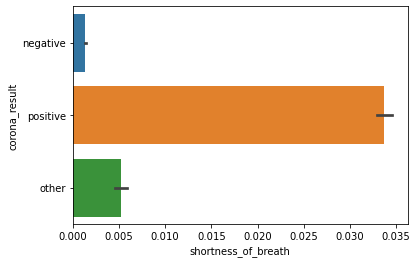

In [24]:
sns.barplot(final_data['shortness_of_breath'], final_data['corona_result'])

<AxesSubplot:xlabel='cough', ylabel='corona_result'>

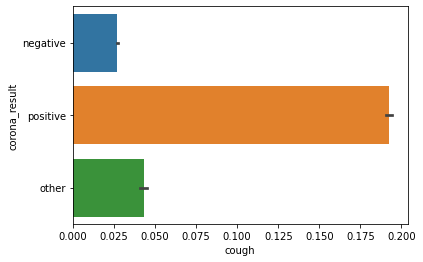

In [25]:
sns.barplot(final_data['cough'], final_data['corona_result'])


<AxesSubplot:xlabel='head_ache', ylabel='corona_result'>

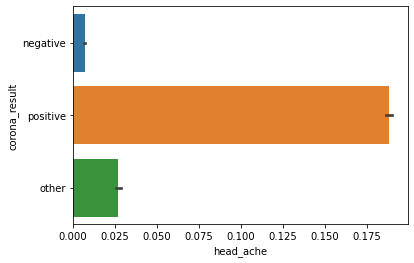

In [26]:
sns.barplot(final_data['head_ache'], final_data['corona_result'])

<AxesSubplot:xlabel='sore_throat', ylabel='corona_result'>

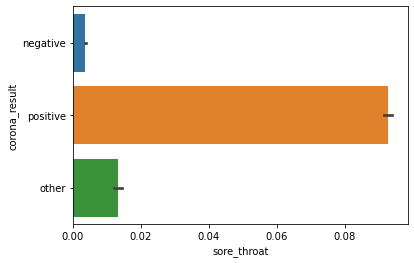

In [27]:
sns.barplot(final_data['sore_throat'], final_data['corona_result'])

## Pre-Processing 

In [28]:
le = preprocessing.LabelEncoder()
final_data= final_data.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')

In [29]:
# label columns having more than 1 value
final_data['corona_result'] = le.fit_transform(final_data['corona_result'])
final_data['gender'] = le.fit_transform(final_data['gender'])
final_data['age_60_and_above'] = le.fit_transform(final_data['age_60_and_above'])
final_data['test_indication'] = le.fit_transform(final_data['test_indication'])

In [30]:
final_data

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,0,0,0,0,0,0,1,2
1,0,1,0,0,0,0,0,1,2
2,0,0,0,0,0,0,1,0,2
3,0,0,0,0,0,0,0,1,2
4,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
2742591,0,0,0,0,0,0,2,0,2
2742592,0,0,0,0,0,0,2,0,2
2742593,0,0,0,0,0,1,2,1,2
2742594,0,0,0,0,0,0,2,0,2


In [31]:
for i in final_data.columns:
    print("\nColumn Name:",i,final_data[i].unique(),"Unique Count",len(final_data[i].unique()))


Column Name: cough [0 1] Unique Count 2

Column Name: fever [0 1] Unique Count 2

Column Name: sore_throat [0 1] Unique Count 2

Column Name: shortness_of_breath [0 1] Unique Count 2

Column Name: head_ache [0 1] Unique Count 2

Column Name: corona_result [0 2 1] Unique Count 3

Column Name: age_60_and_above [0 1 2] Unique Count 3

Column Name: gender [1 0 2] Unique Count 3

Column Name: test_indication [2 1 0] Unique Count 3


## Model

In [32]:
final_data.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,0,0,0,0,0,0,1,2
1,0,1,0,0,0,0,0,1,2
2,0,0,0,0,0,0,1,0,2
3,0,0,0,0,0,0,0,1,2
4,0,1,0,0,0,0,0,1,1


In [33]:
# target is y and features in X
y = final_data['corona_result']
X = final_data.drop(['corona_result'], axis = 1)

In [34]:
X

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication
0,0,0,0,0,0,0,1,2
1,0,1,0,0,0,0,1,2
2,0,0,0,0,0,1,0,2
3,0,0,0,0,0,0,1,2
4,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...
2742591,0,0,0,0,0,2,0,2
2742592,0,0,0,0,0,2,0,2
2742593,0,0,0,0,0,2,1,2
2742594,0,0,0,0,0,2,0,2


In [35]:
y

0          0
1          0
2          0
3          0
4          0
          ..
2742591    0
2742592    0
2742593    1
2742594    0
2742595    0
Name: corona_result, Length: 2742596, dtype: int64

In [36]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Classification

### Random Forest Classifier

In [37]:
# For plotting accuracy of different alogrithms
scores_dict = {}

In [38]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)

In [39]:
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train, y_train)
predRandomForest = RandomForest.predict(X_test)
accuracy_rf = accuracy_score(y_test, predRandomForest)
print('RandomForest accuracy_score: ', accuracy_rf)
scores_dict['RandomForestClassifier'] = accuracy_rf * 100

RandomForest accuracy_score:  0.9258805513016846


<AxesSubplot:xlabel='corona_result', ylabel='Density'>

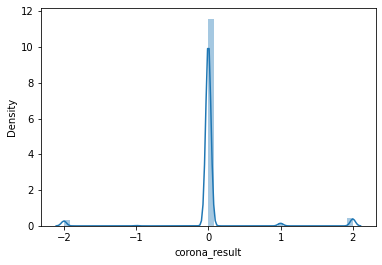

In [40]:
sns.distplot(y_test-pred)

### Decision Tree Classifier

In [41]:
DecisionTree = DecisionTreeClassifier()
DecisionTree = DecisionTree.fit(X_train, y_train)
pred = DecisionTree.predict(X_test)
accuracy_dt = accuracy_score(y_test, pred)
print('DecisionTree accuracy_score: ', accuracy_dt)
scores_dict['DecisionTreeClassifier'] = accuracy_dt * 100

DecisionTree accuracy_score:  0.9258769051265223


In [42]:
scores_dict

{'RandomForestClassifier': 92.58805513016846,
 'DecisionTreeClassifier': 92.58769051265223}

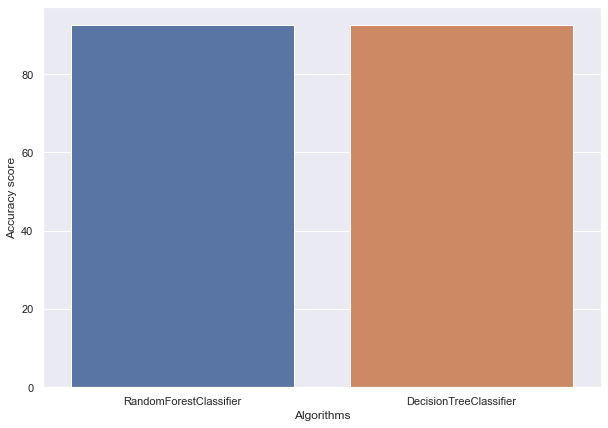

In [43]:
with sns.color_palette('muted'):
  algo_name = list(scores_dict.keys())
  scoress = list(scores_dict.values())

  sns.set(rc={'figure.figsize':(10,7)})
  plt.xlabel("Algorithms")
  plt.ylabel("Accuracy score")

  sns.barplot(algo_name,scoress)

In [44]:
# store the data
file = open('rf_model.pkl', 'wb')

# dump data
pickle.dump(RandomForest, file)